## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---



Laboratorio - Análisis Bivariado EDA: Adentrándose en las Perspectivas de Productos de Amazon UK Parte II

Objetivo: Adentrarse en la dinámica de los precios de los productos en Amazon UK para descubrir ideas que puedan informar estrategias comerciales y la toma de decisiones.

Conjunto de datos: Este laboratorio utiliza el conjunto de datos de productos de Amazon UK, que proporciona información sobre categorías de productos, marcas, precios, calificaciones y más de Amazon UK. Deberás descargarlo para empezar a trabajar con él.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm 


%matplotlib inline
pd.set_option('display.max_columns', None)

"amz_uk_price_prediction_dataset.csv"

In [2]:
df = pd.read_csv()

In [3]:
dfcopy = df.copy()

In [4]:
df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2429806,2808033,B0BK9BZBKW,COMPATIBLE WITH E-TON DXL Sierra/U 2T 90 2000-...,0.0,0,24.95,False,0,Motorbike Batteries
1235988,1369376,B0CJCF9SBB,Golf Club Bag Mini Lightweight for Men Women L...,0.0,0,9.89,False,0,Sports & Outdoors
2134747,2475801,B08HYYJQZW,"Xiaomi Redmi 9AT - Smartphone 32GB, 2GB RAM, D...",4.2,248,87.55,False,0,Mobile Phones & Smartphones
2053532,2319179,B0CHM8C6DH,Beavorty 8 pcs plush cat ear headband hair han...,0.0,0,18.91,False,0,Sports & Outdoors
1230584,1363868,B0BVJVDJDS,"SEFAX Golf Bag for Men Women, Portable Retract...",0.0,0,996.07,False,0,Sports & Outdoors


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

Parte 1: Analizando las Tendencias de los Mejores Vendedores a Través de las Categorías de Productos

Objetivo: Comprender la relación entre las categorías de productos y su estado de mejor vendedor.

Análisis de Crosstab:

Crear una tabla cruzada entre la categoría del producto y el estado de mejor vendedor.

¿Hay categorías donde ser un mejor vendedor es más prevalente?

Pista: una opción es calcular la proporción de mejores vendedores para cada categoría y luego ordenar las categorías en función de esta proporción en orden descendente.

Pruebas Estadísticas:

Realizar una prueba de Chi-cuadrado para determinar si la distribución de los mejores vendedores es independiente de la categoría del producto.
Calcular el coeficiente de Cramér para entender la fuerza de la asociación entre el estado de mejor vendedor y la categoría.
Visualizaciones:

Visualizar la relación entre las categorías de productos y el estado de mejor vendedor utilizando un gráfico de barras apiladas

## hago un crosstab de las categorias indicadas

In [5]:
crosstab_category_isbestseller = pd.crosstab(df['category'], df['isBestSeller'])

In [6]:
crosstab_category_isbestseller

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


## añado el total

In [7]:
crosstab_category_isbestseller["total"] = crosstab_category_isbestseller.sum(axis=1)


In [8]:
crosstab_category_isbestseller

isBestSeller,False,True,total
category,,,
3D Printers,247,1,248
3D Printing & Scanning,4065,2,4067
Abrasive & Finishing Products,245,5,250
Action Cameras,1696,1,1697
Adapters,251,3,254
...,...,...,...
Wind Instruments,243,7,250
Window Treatments,234,5,239
Women,17559,213,17772


## no entiendo xq no me deja seleccionar la columna "True" y busco los nombres de las columnas, finalmente sin las "" funciona

In [9]:
crosstab_category_isbestseller.columns

Index([False, True, 'total'], dtype='object', name='isBestSeller')

In [10]:
crosstab_category_isbestseller["proporcion"] = crosstab_category_isbestseller[True] / crosstab_category_isbestseller["total"] *100

In [11]:
crosstab_category_isbestseller

isBestSeller,False,True,total,proporcion
category,,,,
3D Printers,247,1,248,0.403226
3D Printing & Scanning,4065,2,4067,0.049176
Abrasive & Finishing Products,245,5,250,2.000000
Action Cameras,1696,1,1697,0.058928
Adapters,251,3,254,1.181102
...,...,...,...,...
Wind Instruments,243,7,250,2.800000
Window Treatments,234,5,239,2.092050
Women,17559,213,17772,1.198515


## ordeno el df segun la proporcion de True

In [12]:
crosstab_category_isbestseller = crosstab_category_isbestseller.sort_values(by="proporcion", ascending=False)

In [13]:
crosstab_category_isbestseller

isBestSeller,False,True,total,proporcion
category,,,,
Grocery,9008,556,9564,5.813467
Smart Home Security & Lighting,98,6,104,5.769231
Health & Personal Care,9017,552,9569,5.768628
Mobile Phone Accessories,248,11,259,4.247104
Power & Hand Tools,8353,306,8659,3.533895
...,...,...,...,...
"CD, Disc & Tape Players",8798,0,8798,0.000000
General Music-Making Accessories,259,0,259,0.000000
Snowboard Boots,1449,0,1449,0.000000


## averiguo p_value para chi2

In [14]:
chi2, p_value, dof, expected = chi2_contingency(crosstab_category_isbestseller)

In [15]:
p_value

0.0

In [16]:
print(f'{p_value:.10f}')

0.0000000000


## hago el crosstab otra vez xq no me deja hacer cramer con floats de la proporcion

#parece que hay una relacion segun chi-square

In [17]:
crosstab_category_isbestsellerparacramer = pd.crosstab(df['category'], df['isBestSeller'])

In [18]:
association(crosstab_category_isbestsellerparacramer, method='cramer')

0.1222829439760564

#cramers indica una relacion positiva pero debil

In [19]:
isBestSeller_frecuencia = df['isBestSeller'].value_counts(normalize=True)

In [20]:
crosstab_category_isbestseller_normalize = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

In [21]:
crosstab_category_isbestseller_normalize

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


<Axes: xlabel='category'>

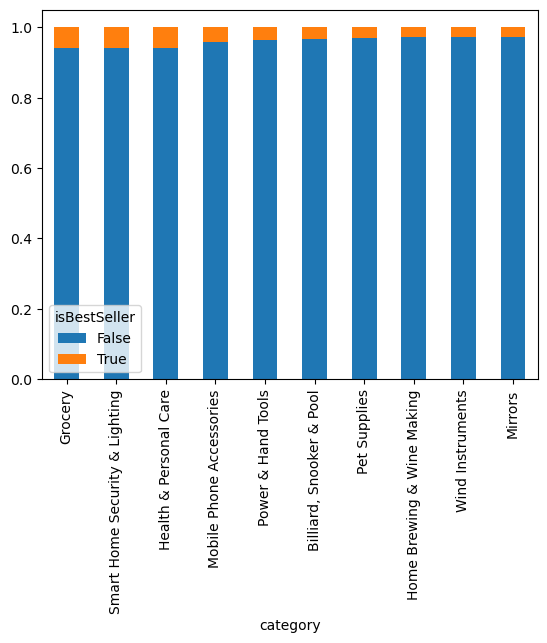

In [22]:
crosstab_category_isbestseller_normalize.sort_values(by=True, ascending=False).head(10).plot(kind="bar", stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

Parte 2: Explorando Precios y Calificaciones de Productos a Través de Categorías y Marcas

Objetivo: Investigar cómo diferentes categorías de productos influyen en los precios de los productos.

Paso Preliminar: Eliminar valores atípicos en los precios de los productos.

Para este propósito, podemos utilizar el método del Rango Intercuartílico (IQR, por sus siglas en inglés). Los productos con precios por debajo del primer cuartil menos 1.5 veces el IQR o por encima del tercer cuartil más 1.5 veces el IQR se considerarán valores atípicos y se eliminarán del conjunto de datos. Los siguientes pasos se realizarán con el dataframe sin valores atípicos.

Pista: puedes revisar la última Revisión Para la Comprensión al final de la lección de Análisis Bivariado EDA para obtener una pista sobre cómo hacer esto.

Gráficos de Violín:

Utiliza un gráfico de violín para visualizar la distribución de precios a través de diferentes categorías de productos. Filtra las 20 categorías principales basadas en el recuento para una mejor visualización.
¿Qué categoría de producto tiende a tener el precio medio más alto? No filtres aquí por las categorías principales.
Gráficos de Barras:

Crea un gráfico de barras comparando el precio promedio de productos para las 10 categorías principales de productos (basado en el recuento).
¿Qué categoría de producto tiene el precio promedio más alto? No filtres aquí por las categorías principales.
Diagramas de Caja:

Visualiza la distribución de las calificaciones de productos según su categoría utilizando diagramas de caja lado a lado. Filtra las 10 categorías principales basadas en el recuento para una mejor visualización.
¿Qué categoría tiende a recibir la calificación mediana más alta de los clientes? No filtres aquí por las categorías principales.

In [23]:
df["price"].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

## quito los outliers tambien se puede hacer de esta manera
df['SalePrice_quantile'] = pd.qcut(df['SalePrice'], q=4, labels=['Q1', 'Q2', 'Q3', "Q4"])

In [24]:
df_prices_outliers = dfcopy[(df["price"] < df["price"].quantile(0.75)) & (df["price"] > df["price"].quantile(0.25))]

In [25]:
df_prices_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443635,2828576,B0BHQZBSJD,Roucerlin 4 Pcs Soft Motorcycle Motorbike Shif...,3.5,2,14.49,False,0,Motorbike Clothing
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443644,2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2443645,2828588,B0BQMXJPP5,Helmet Ponytail Pigtails Twist Braids Hair wit...,0.0,0,19.99,False,0,Motorbike Clothing


## averiguo las 20 categorias más altas

In [26]:
df_prices_outliers["category"].value_counts().head(20)

category
Sports & Outdoors                         427311
Women                                      11787
Men                                        11605
Birthday Gifts                             10893
Handmade Kitchen & Dining                  10617
Handmade Artwork                           10289
Fragrances                                 10266
Handmade Gifts                             10188
Bath & Body                                 9930
Skin Care                                   9789
Luggage and travel gear                     9623
Baby                                        8933
Handmade Home Décor                         8857
Handmade Home & Kitchen Products            8569
Boys                                        8229
Handmade Jewellery                          7970
Hair Care                                   7924
Handmade                                    7882
Handmade Clothing, Shoes & Accessories      7343
Beauty                                      7307
Name: count

## las meto en una variable

In [27]:
top_categories = df_prices_outliers["category"].value_counts().head(20).index

In [28]:
top_categories

Index(['Sports & Outdoors', 'Women', 'Men', 'Birthday Gifts',
       'Handmade Kitchen & Dining', 'Handmade Artwork', 'Fragrances',
       'Handmade Gifts', 'Bath & Body', 'Skin Care', 'Luggage and travel gear',
       'Baby', 'Handmade Home Décor', 'Handmade Home & Kitchen Products',
       'Boys', 'Handmade Jewellery', 'Hair Care', 'Handmade',
       'Handmade Clothing, Shoes & Accessories', 'Beauty'],
      dtype='object', name='category')

## creo un df con las top categorias con el filtro isin

In [29]:
df_top_categories = df_prices_outliers[df_prices_outliers["category"].isin(top_categories)]

In [30]:
df_top_categories

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19519,21078,B0BRVSX2TR,Baby shower baby book | wishes for baby guestb...,4.1,24,12.99,True,300,Handmade Home & Kitchen Products
19529,21088,B08NK7479J,"Any Song First Dance Wedding, Anniversary, Bir...",4.7,815,18.45,False,200,Handmade Home & Kitchen Products
19532,21091,B0BQ7M1WRY,"Artificial flowers in Grave pot, 27cm in warm ...",4.8,38,21.99,True,100,Handmade Home & Kitchen Products
19534,21093,B095KR61HT,"Engagement Wedding Anniversary Date Gifts, Per...",4.6,263,13.95,False,100,Handmade Home & Kitchen Products
19536,21095,B08H2GSTZ9,Personalised 3D Street Sign | 8 Colours | Wate...,4.7,1103,26.99,True,200,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2397647,2767912,B0CGDFTGVW,"killtec Women's Kos 67 Wmn Vst 2-layer vest, f...",0.0,0,37.68,False,0,Sports & Outdoors
2397652,2767930,B00DZO0K5I,Trespass Girl's Vee Jacket,4.4,37,26.38,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


## grafico violines

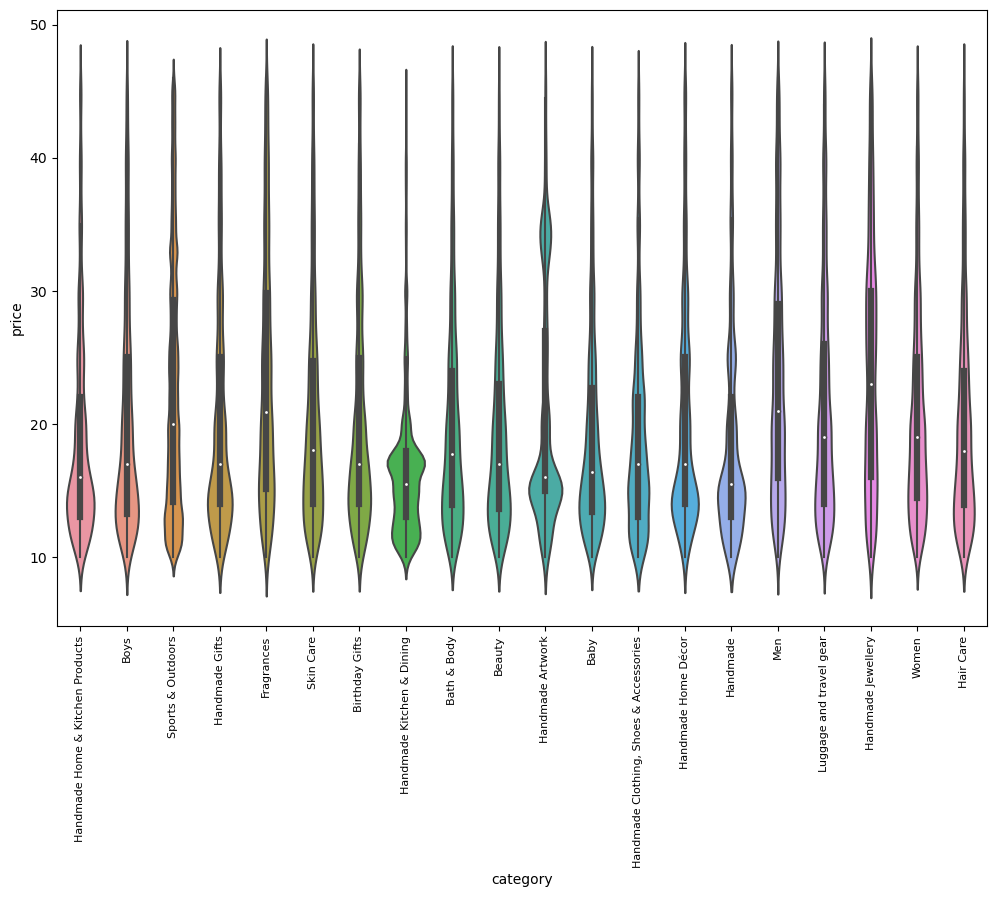

In [31]:
plt.figure(figsize=(12, 8))
grafico1 = sns.violinplot(data=df_top_categories, x="category", y="price")
grafico1.set_xticklabels(grafico1.get_xticklabels(), fontsize=8, rotation=90)
plt.show()

In [32]:
df_top_categories["category"].value_counts()

category
Sports & Outdoors                         427311
Women                                      11787
Men                                        11605
Birthday Gifts                             10893
Handmade Kitchen & Dining                  10617
Handmade Artwork                           10289
Fragrances                                 10266
Handmade Gifts                             10188
Bath & Body                                 9930
Skin Care                                   9789
Luggage and travel gear                     9623
Baby                                        8933
Handmade Home Décor                         8857
Handmade Home & Kitchen Products            8569
Boys                                        8229
Handmade Jewellery                          7970
Hair Care                                   7924
Handmade                                    7882
Handmade Clothing, Shoes & Accessories      7343
Beauty                                      7307
Name: count

## agrupo las top categorias con el precio medio

In [33]:
df_top_categories_price = df_top_categories.groupby("category")["price"].mean()

In [34]:
df_top_categories_price

category
Baby                                      18.997253
Bath & Body                               19.717424
Beauty                                    19.351406
Birthday Gifts                            20.040120
Boys                                      20.162706
Fragrances                                23.151714
Hair Care                                 19.824710
Handmade                                  18.580912
Handmade Artwork                          20.415161
Handmade Clothing, Shoes & Accessories    18.960552
Handmade Gifts                            19.970350
Handmade Home & Kitchen Products          18.751371
Handmade Home Décor                       20.067909
Handmade Jewellery                        24.081365
Handmade Kitchen & Dining                 16.332347
Luggage and travel gear                   21.107459
Men                                       23.216490
Skin Care                                 20.333042
Sports & Outdoors                         22.455764
Wom

## lo hago df

In [35]:
df_top_categories_price = pd.DataFrame(df_top_categories_price)

In [36]:
df_top_categories_price

,price
category,
Baby,18.997253
Bath & Body,19.717424
Beauty,19.351406
Birthday Gifts,20.040120
Boys,20.162706
Fragrances,23.151714
Hair Care,19.824710
Handmade,18.580912
Handmade Artwork,20.415161


## busco el valor mas alto

In [37]:
df_top_categories_price.sort_values(by="price", ascending=False).head(10)

,price
category,
Handmade Jewellery,24.081365
Men,23.216490
Fragrances,23.151714
Sports & Outdoors,22.455764
Luggage and travel gear,21.107459
Women,20.590419
Handmade Artwork,20.415161
Skin Care,20.333042
Boys,20.162706


## grafico de las top categories y su media

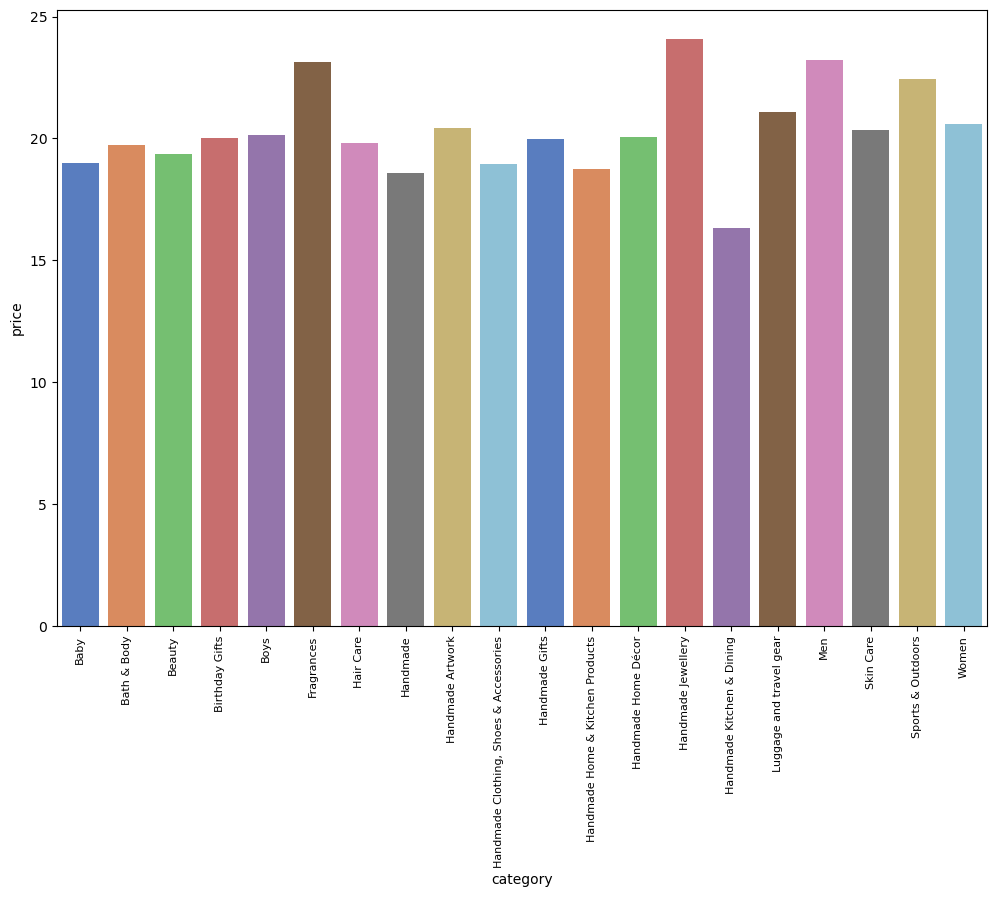

In [38]:
plt.figure(figsize=(12, 8))
grafico = sns.barplot(data=df_top_categories_price.reset_index(), x="category", y="price", palette="muted")
grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, rotation=90)
plt.show()

In [39]:
df_top_categories

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19519,21078,B0BRVSX2TR,Baby shower baby book | wishes for baby guestb...,4.1,24,12.99,True,300,Handmade Home & Kitchen Products
19529,21088,B08NK7479J,"Any Song First Dance Wedding, Anniversary, Bir...",4.7,815,18.45,False,200,Handmade Home & Kitchen Products
19532,21091,B0BQ7M1WRY,"Artificial flowers in Grave pot, 27cm in warm ...",4.8,38,21.99,True,100,Handmade Home & Kitchen Products
19534,21093,B095KR61HT,"Engagement Wedding Anniversary Date Gifts, Per...",4.6,263,13.95,False,100,Handmade Home & Kitchen Products
19536,21095,B08H2GSTZ9,Personalised 3D Street Sign | 8 Colours | Wate...,4.7,1103,26.99,True,200,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2397647,2767912,B0CGDFTGVW,"killtec Women's Kos 67 Wmn Vst 2-layer vest, f...",0.0,0,37.68,False,0,Sports & Outdoors
2397652,2767930,B00DZO0K5I,Trespass Girl's Vee Jacket,4.4,37,26.38,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


## filtro mas el df anterior

In [40]:
top10_categories = df_top_categories["category"].value_counts().head(10).index

In [41]:
top10_categories

Index(['Sports & Outdoors', 'Women', 'Men', 'Birthday Gifts',
       'Handmade Kitchen & Dining', 'Handmade Artwork', 'Fragrances',
       'Handmade Gifts', 'Bath & Body', 'Skin Care'],
      dtype='object', name='category')

In [42]:
df_top10_categories = df_top_categories[df_top_categories["category"].isin(top10_categories)]

In [43]:
df_top10_categories

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82171,89491,B01171X0UW,NEEWER 50 in 1 Action Camera Accessory Kit Com...,4.5,54495,32.49,False,0,Sports & Outdoors
82174,89494,B0C9Q54GVY,Yolansin 4K30FPS Action Camera with 32GB SD Ca...,4.1,123,39.99,False,0,Sports & Outdoors
82178,89498,B09RKDRP22,GoPro Enduro Rechargeable Battery (HERO11 Blac...,4.6,1525,24.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2397647,2767912,B0CGDFTGVW,"killtec Women's Kos 67 Wmn Vst 2-layer vest, f...",0.0,0,37.68,False,0,Sports & Outdoors
2397652,2767930,B00DZO0K5I,Trespass Girl's Vee Jacket,4.4,37,26.38,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


## hago el grafico con el df filtrado a top10

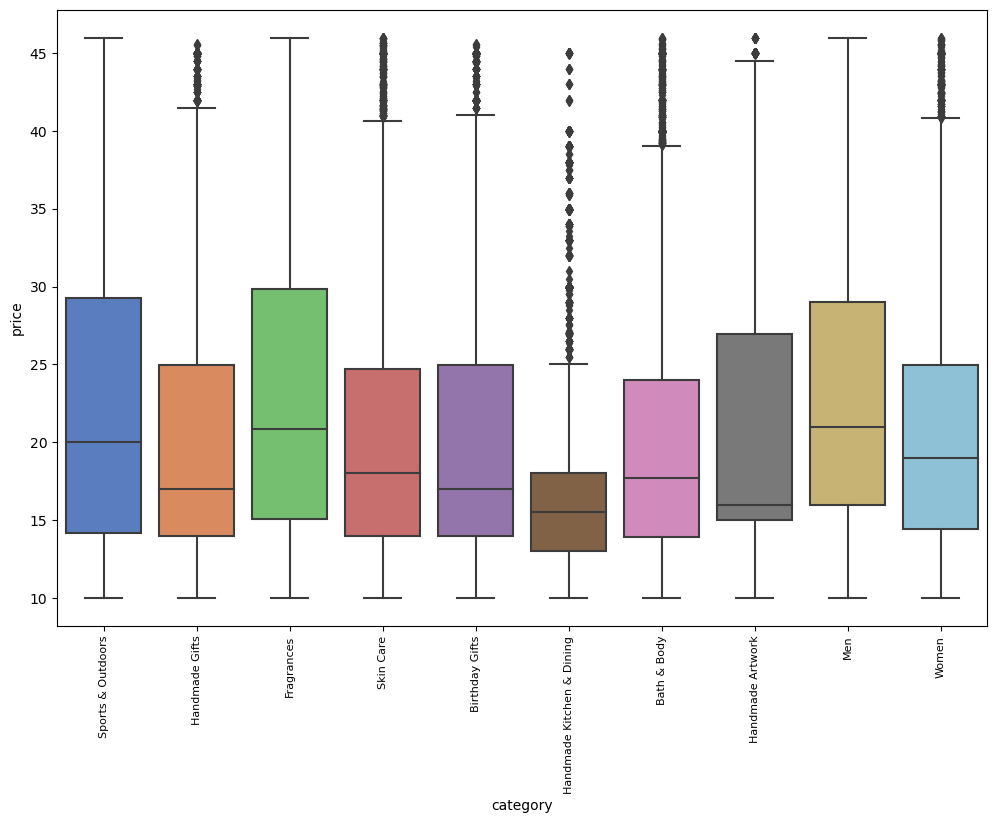

In [44]:
plt.figure(figsize=(12, 8))

grafica2 = sns.boxplot(data=df_top10_categories,
            x="category", 
            y="price", 
            palette="muted")
grafica2.set_xticklabels(grafica2.get_xticklabels(), fontsize=8, rotation=90)
plt.show()

## con el df top 10 hago el mismo grafico pero cogiendo stars

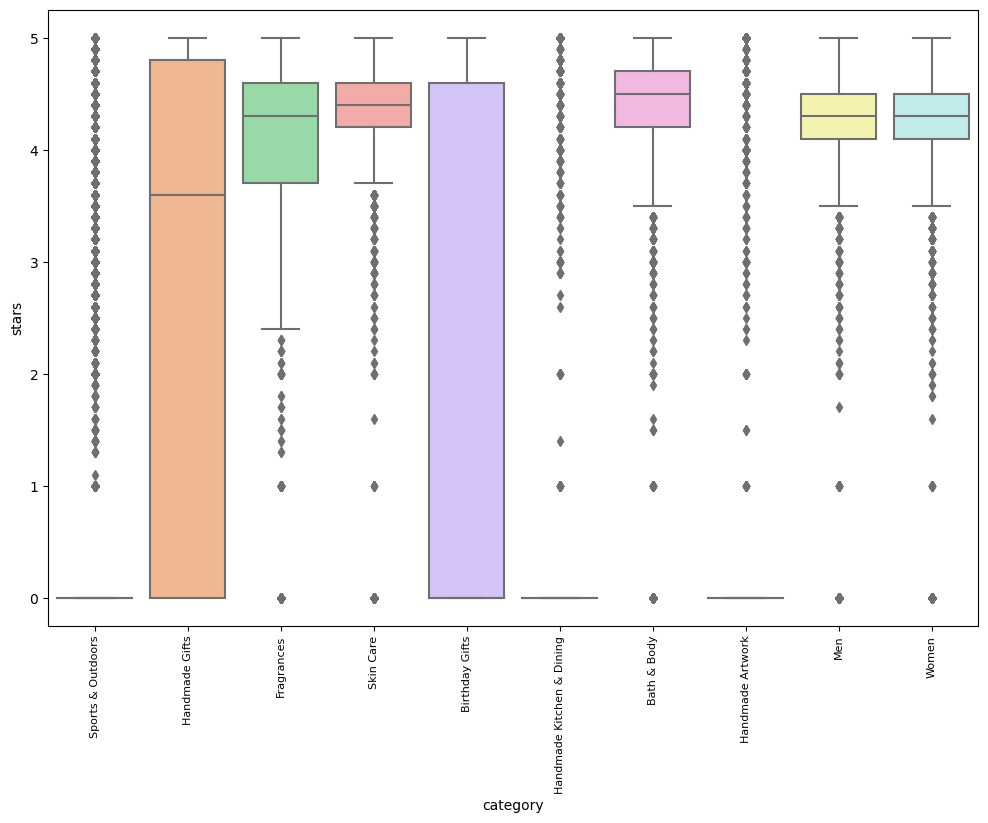

In [45]:
plt.figure(figsize=(12, 8))

grafica2 = sns.boxplot(data=df_top10_categories,
            x="category", 
            y="stars", 
            palette="pastel")
grafica2.set_xticklabels(grafica2.get_xticklabels(), fontsize=8, rotation=90)
plt.show()

## relaciono category con stars con su mediana como valores, las ordeno y veo el top1

In [46]:
df_ejercicio2 = dfcopy.groupby("category")["stars"].median()

In [47]:
df_ejercicio2.sort_values(ascending=False).head(1)

category
Computer Memory    4.7
Name: stars, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?


Parte 3: Investigando la Interacción Entre Precios y Calificaciones de Productos

Objetivo: Analizar cómo se correlacionan las calificaciones de los productos (estrellas) con los precios de los productos.

Coeficientes de Correlación:

Calcular el coeficiente de correlación entre el precio y las estrellas.
¿Existe una correlación significativa entre el precio del producto y su calificación?
Visualizaciones:

Utilizar un gráfico de dispersión para visualizar la relación entre la calificación del producto y el precio. ¿Qué patrones puedes observar?
Utilizar un mapa de calor de correlación para visualizar las correlaciones entre todas las variables numéricas.
Examinar si los precios de los productos siguen típicamente una distribución normal utilizando un gráfico QQ.
Envío: Enviar un Cuaderno Jupyter que contenga código y un informe centrado en el negocio resumiendo tus hallazgos.

Bonus:

Realizar el mismo análisis sin eliminar los valores atípicos. ¿Cuáles son tus conclusiones?

## calculo relacion con pearson

In [48]:
corr_pea = dfcopy["stars"].corr(dfcopy["price"])

In [49]:
corr_pea

-0.12490673262149232

## calculo relacion con spearman

In [50]:
corr_sp = dfcopy["stars"].corr(dfcopy["price"], method="spearman")

In [51]:
corr_sp

-0.13316425462434212

## existe una debil correlacion negativa entre las dos variables numericas

<Axes: xlabel='stars', ylabel='price'>

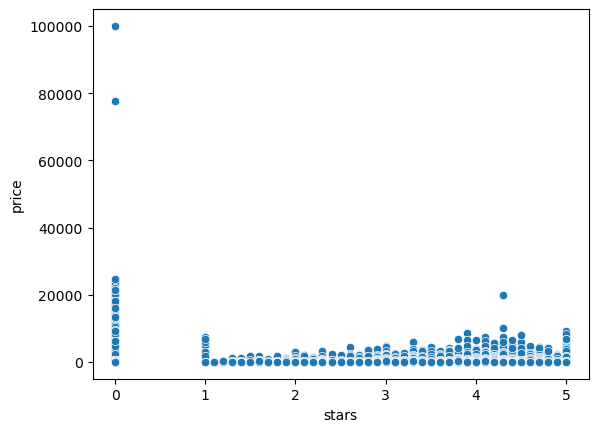

In [52]:
sns.scatterplot(data=dfcopy, x="stars", y="price")

## hago listas para variables numerica y categoricas

In [53]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

In [54]:
cat = pd.concat([dfcopy.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
num = dfcopy.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

## hago el grafico heatmap

In [55]:
num_corr = num.corr()

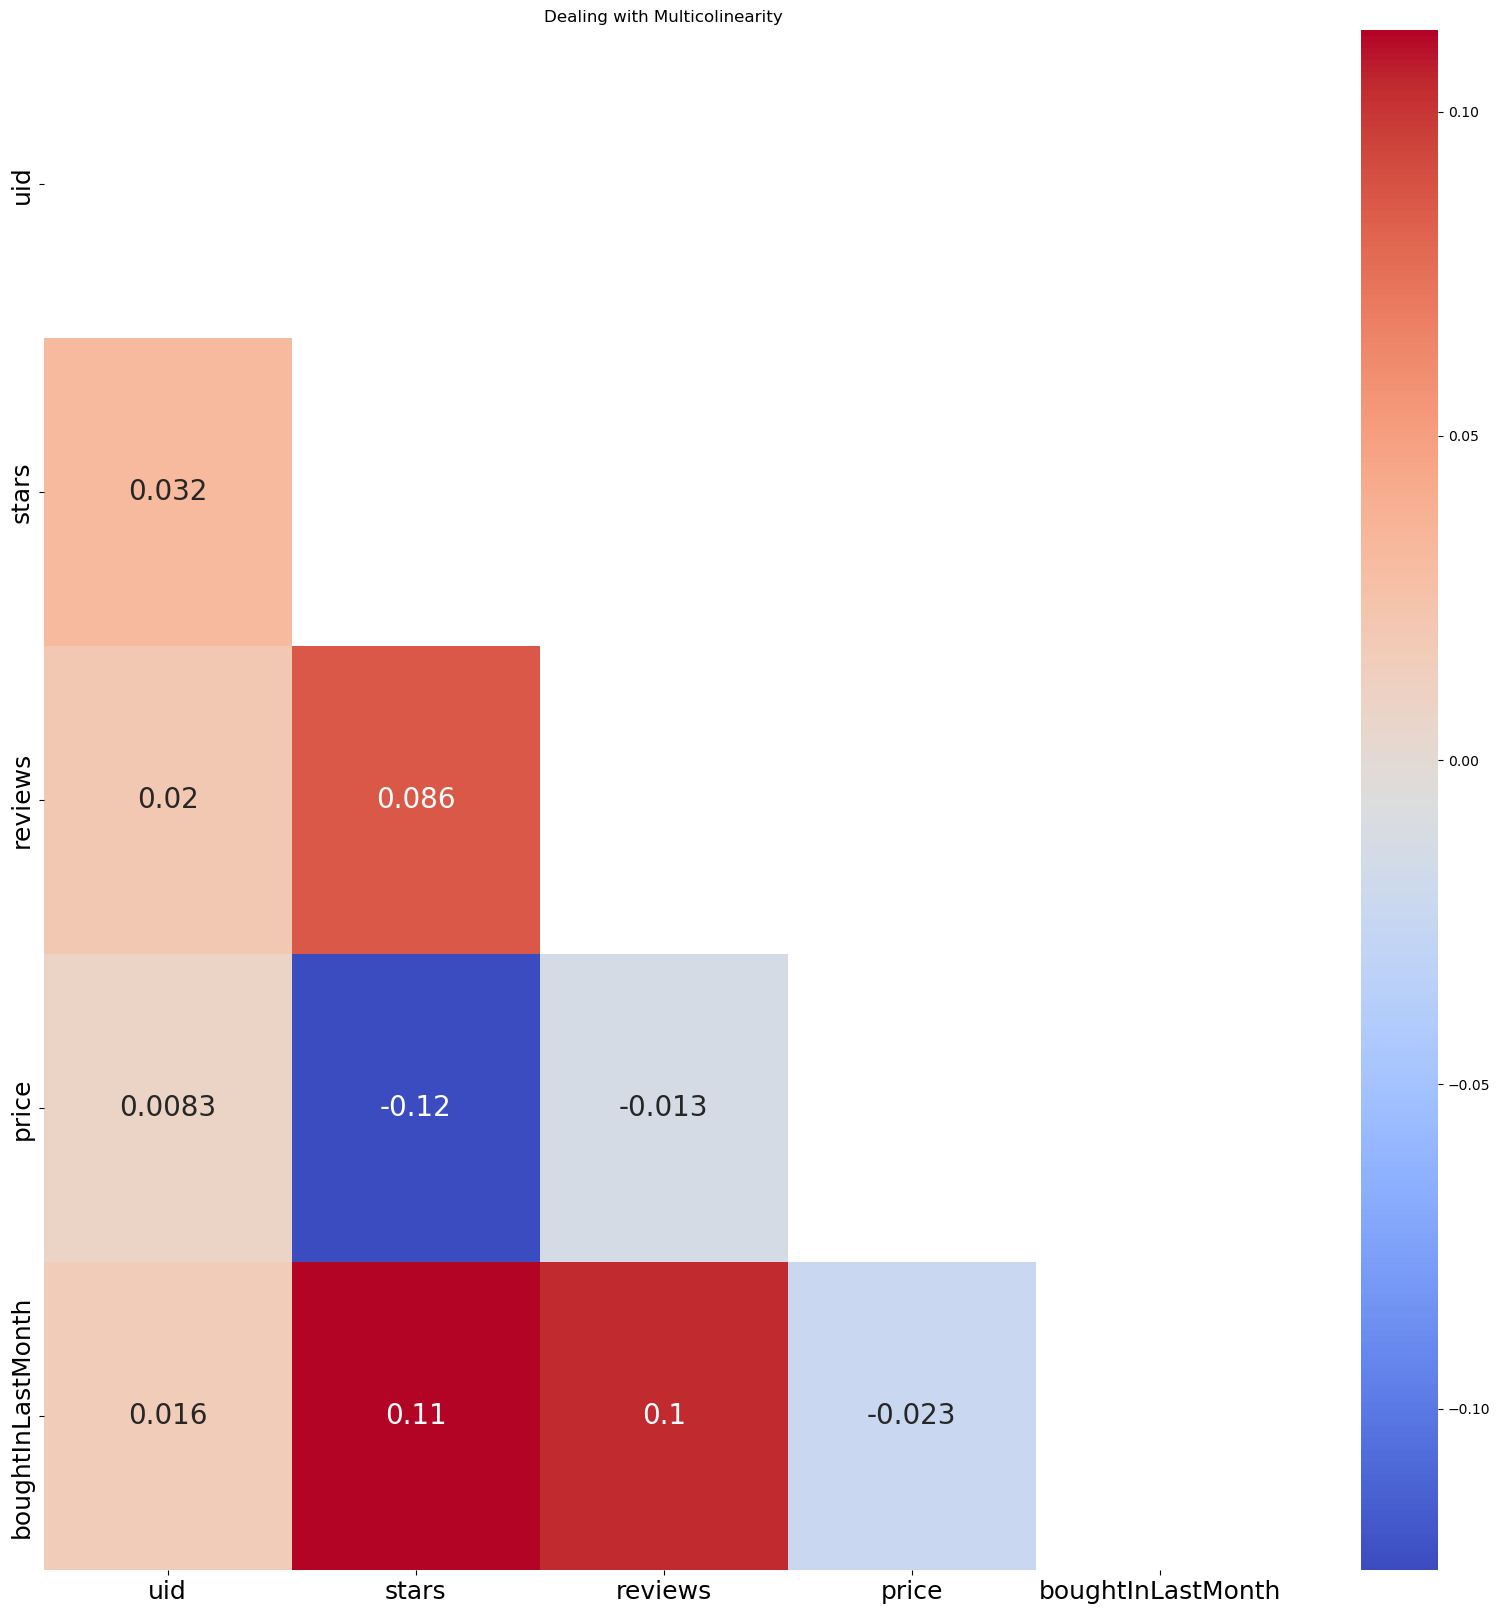

In [56]:
mask = np.triu(np.ones_like(num_corr, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(num_corr, cmap="coolwarm", annot=True,
            xticklabels="auto", yticklabels="auto",
            mask=mask, annot_kws={"size": 20})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Dealing with Multicolinearity")
plt.show()


## hago el qq plot

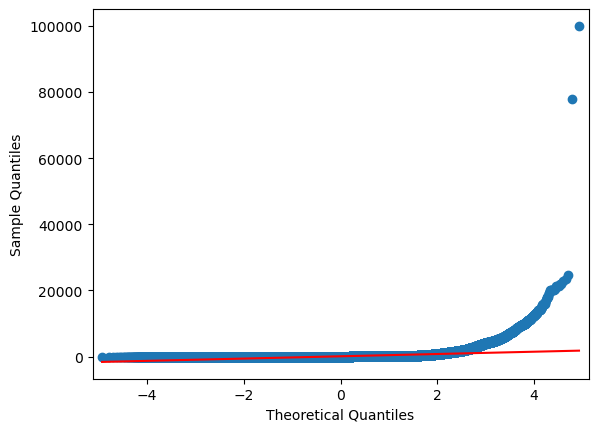

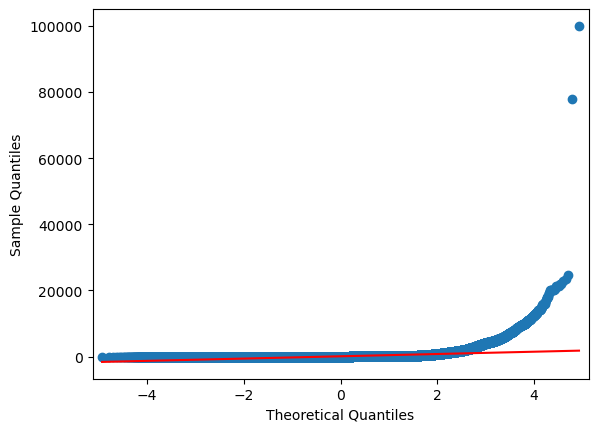

In [57]:
sm.qqplot(dfcopy["price"], line="s")

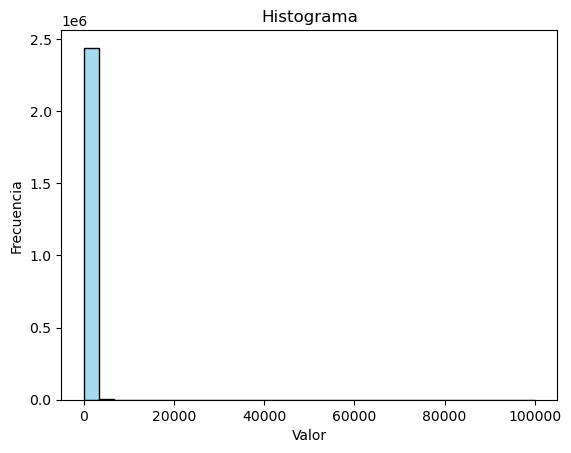

In [58]:
sns.histplot(data= dfcopy["price"], bins=30, color='skyblue', edgecolor='black')


plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma')

plt.show()


## con el histograma se ve mas facil que no es una distribucion normal